In [1]:
pip install keras

In [2]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Succes

In [3]:
pip install --upgrade keras tensorflow

In [4]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

print("loaded libraries")


loaded libraries


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
def extract_mfcc(wav_file_name):
  y, sr = librosa.load(wav_file_name)
  mfccs =np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)

  return mfccs


In [7]:
radvess_speech_labels = []
ravdess_speech_data = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ravdess'):
  for filename in filenames:
    radvess_speech_labels.append(int(filename[7:8]) - 1)
    wav_file_name = os.path.join(dirname, filename)
    ravdess_speech_data.append(extract_mfcc(wav_file_name))

print("Finish Loading the Dataset")

Finish Loading the Dataset


In [8]:
ravdess_speech_data

[array([-7.2461487e+02,  8.7945343e+01,  1.7747797e+00,  2.7607702e+01,
        -5.6054592e-01,  1.4330881e+01, -8.6109465e-01,  4.0377161e-01,
        -7.4203916e+00,  6.7487651e-01,  3.4111006e+00, -4.4969883e+00,
         9.2204351e+00, -4.0430978e-01, -6.8357241e-01,  4.2454772e+00,
         1.5997291e+00, -2.7623014e+00,  4.8566608e+00,  1.3113153e+00,
        -4.2522283e+00,  4.9084103e-01, -2.0256987e+00, -1.1478209e+00,
        -1.7895686e-02,  1.8200040e+00, -3.3824340e-01,  2.6560490e+00,
         1.5929674e+00,  6.3113517e-01,  3.1011963e+00, -1.4789556e+00,
         1.6375371e-03,  8.1582749e-01, -1.3666670e-01,  5.9496635e-01,
        -5.3466922e-01, -2.7778454e+00, -2.1951647e+00, -7.2847986e-01],
       dtype=float32),
 array([-7.2022870e+02,  9.1724731e+01, -2.1448798e+00,  3.4073547e+01,
        -2.5632412e+00,  1.7398054e+01, -5.9291401e+00, -2.0022399e+00,
        -1.1114963e+01,  9.1629314e-01,  3.5463450e+00, -4.4582577e+00,
         8.6641655e+00, -1.7435911e+00, 

In [9]:

ravdess_speech_data_array = np.asarray(ravdess_speech_data)
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape

labels_categorical = to_categorical(ravdess_speech_label_array)
labels_categorical.shape

(1440, 8)

In [10]:
ravdess_speech_data_array

array([[-7.2461487e+02,  8.7945343e+01,  1.7747797e+00, ...,
        -2.7778454e+00, -2.1951647e+00, -7.2847986e-01],
       [-7.2022870e+02,  9.1724731e+01, -2.1448798e+00, ...,
        -1.1657559e+00, -1.8245326e-01,  3.7801853e-01],
       [-7.2320502e+02,  8.1215576e+01, -2.1042909e-01, ...,
        -2.2331192e+00, -1.8367288e+00, -5.8452290e-01],
       ...,
       [-6.1557904e+02,  6.5497696e+01, -1.9175404e+01, ...,
        -1.1001868e+00, -1.2154289e+00, -1.5274367e+00],
       [-6.6835681e+02,  6.3974510e+01, -1.0933477e+01, ...,
        -5.5834079e-01, -1.3848095e+00, -2.0791264e+00],
       [-6.7899762e+02,  6.8158524e+01, -1.3874587e+01, ...,
        -1.9017301e+00, -2.1864817e+00, -2.3956583e+00]], dtype=float32)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(np.array(ravdess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [12]:
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [13]:
def create_model_LSTM():
  model = Sequential()
  model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dense(32))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(8))
  model.add(Activation('softmax'))

  model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics =['accuracy'])
  return model

In [14]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)


In [15]:
w.shape

(1152, 40, 1)

In [16]:
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=130, shuffle=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/130
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.1526 - loss: 2.0752 - val_accuracy: 0.1389 - val_loss: 2.0467
Epoch 2/130
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.1681 - loss: 2.0409 - val_accuracy: 0.3056 - val_loss: 1.9188
Epoch 3/130
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.2266 - loss: 1.9705 - val_accuracy: 0.1806 - val_loss: 1.9767
Epoch 4/130
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.2329 - loss: 1.9428 - val_accuracy: 0.2153 - val_loss: 1.9048
Epoch 5/130
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.2545 - loss: 1.9183 - val_accuracy: 0.2292 - val_loss: 1.8759
Epoch 6/130
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.2659 - loss: 1.9145 - val_accuracy: 0.2014 - val_loss: 1.9142
Epoch 7/130
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.2621 - loss: 1.8861 - val_accuracy: 0.2292 - val_loss: 1.9021
Epoch 8/130
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2817 - loss: 1.8511 - val_accuracy: 0.

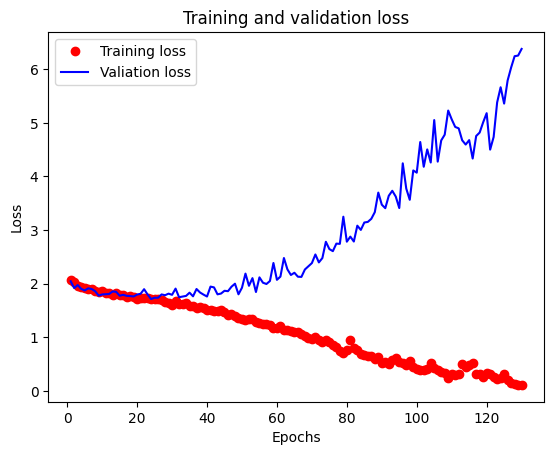

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Valiation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

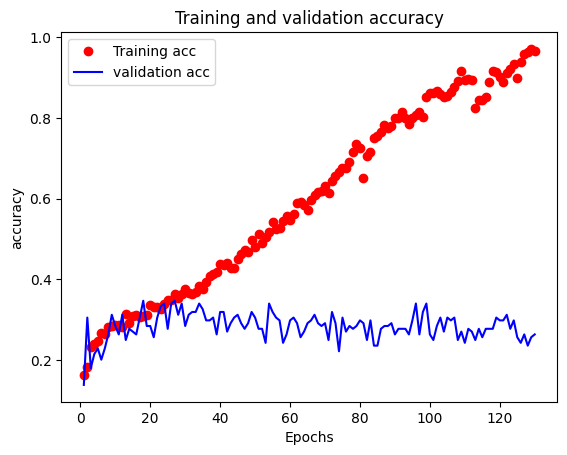

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [19]:
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:] , -1),labels_categorical[training_samples + validation_samples:])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3038 - loss: 4.6658


[4.872047424316406, 0.2291666716337204]

In [20]:
emotions={1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surprised'}
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [21]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess speech emotion recognition dataset/Actor_01/03-01-01-01-01-01-01.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
neutral


In [22]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess speech emotion recognition dataset/Actor_01/03-01-02-01-01-01-01.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
neutral


In [23]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess speech emotion recognition dataset/Actor_01/03-01-03-02-02-01-01.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
sad


In [24]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess speech emotion recognition dataset/Actor_08/03-01-05-02-01-02-08.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
angry


In [25]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess speech emotion recognition dataset/Actor_13/03-01-08-01-02-01-13.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
surprised


In [26]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess speech emotion recognition dataset/Actor_01/03-01-01-01-01-01-01.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
neutral


In [27]:
predict('/content/drive/MyDrive/ravdess/Actor_01/03-01-01-01-01-01-01.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
calm
